IMPORT SECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid


# READING THE DATSET CSV

In [2]:
train_set = pd.read_csv("CE802_Ass_2019_Data.csv")

x1_train_set = train_set.iloc[:,:-1]
x2_train_set = train_set.iloc[:,:-2]
y_trained_set = train_set.iloc[:,-1].astype(str)


TRANSFORM TRAIN SET WITH MEAN VALUE 

In [3]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(x1_train_set)
x1_transform = imp.transform(x1_train_set)
#x1_transform

In [4]:
imp.fit(x2_train_set)
x2_transform = imp.transform(x2_train_set)

TRANSFORM TRAIN SET WITH MEDIAN VALUE 

In [5]:
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp1.fit(x1_train_set)
x1_transformed = imp1.transform(x1_train_set)
#x1_transformed

TRANSFORM TRAIN SET WITH MOST FREQUENT VALUE (MODE)

In [6]:
from sklearn.impute import SimpleImputer
imp2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp2.fit(x1_train_set)
x1_transformedmode = imp2.transform(x1_train_set)
#x1_transformedmode

# USING DECISION TREES CLASSIFIER


USING THE TRANSFORMED DATA SET X1 (MEAN) - WITH THE MISSING VALUES (Nan) 


In [7]:
score = []
kappa_statistic = []


clf = tree.DecisionTreeClassifier(max_depth = 5)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transform):
    
    clf.fit(x1_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.5880000000000001
The average Kappa is: 0.1333605525164367


[Text(148.8, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(186.0, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(74.4, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(223.20000000000002, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

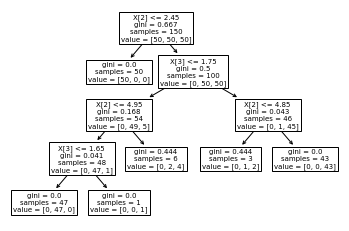

In [8]:
from sklearn.datasets import load_iris
from sklearn import tree
X = x1_train_set
y = y_trained_set
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf = clf.fit(X, y)
tree.plot_tree(clf.fit(X, y)) 




USING THE DATA SET X2 - WITHOUT THE MISSING VALUES (no Nan) 

In [9]:
score = []
kappa_statistic = []

clf = tree.DecisionTreeClassifier(max_depth = 5)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x2_transform):
    
    clf.fit(x2_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x2_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x2_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.528
The average Kappa is: 0.040553684162964856


[Text(148.8, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(186.0, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(74.4, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(223.20000000000002, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

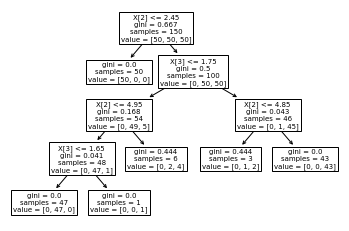

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree
X = x2_transform
y = y_trained_set
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf = clf.fit(X, y)
tree.plot_tree(clf.fit(X, y))

USING THE TRANSFORMED DATA SET X1 (MEDIAN) - WITH THE MISSING VALUES (Nan) 

In [11]:
score = []
kappa_statistic = []

#x1_transform, y_trained_set = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(max_depth = 5)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transform):
    
    clf.fit(x1_transformed[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformed[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformed[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.584
The average Kappa is: 0.12575015612593426


[Text(148.8, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(186.0, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(74.4, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(223.20000000000002, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

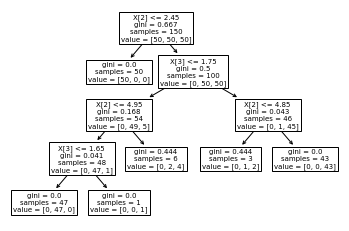

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
X = x1_transformed
y = y_trained_set
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf = clf.fit(X, y)
tree.plot_tree(clf.fit(X, y))

USING THE TRANSFORMED DATA SET X1 (MOST FREQUENT) - WITHOUT THE MISSING VALUES (no Nan) 

In [13]:
score = []
kappa_statistic = []

clf = tree.DecisionTreeClassifier(max_depth = 5)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformedmode):
    
    clf.fit(x1_transformedmode[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformedmode[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformedmode[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.584
The average Kappa is: 0.13068885863633142


[Text(148.8, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(186.0, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(74.4, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(223.20000000000002, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

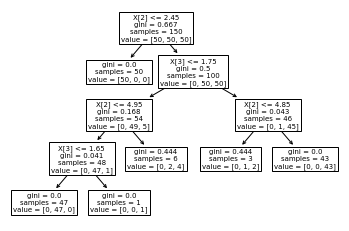

In [14]:
from sklearn.datasets import load_iris
from sklearn import tree
X = x1_transformedmode
y = y_trained_set
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf = clf.fit(X, y)
tree.plot_tree(clf.fit(X, y))

In [15]:
#tree.plot_tree(clf.fit(iris.train_set, iris.test_set)) 

# USING GAUSSIAN NAIVE BAYES

USING THE DATA SET X1(mean imputation)

In [16]:
score = []
kappa_statistic = []

clf =  GaussianNB()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transform):
    
    clf.fit(x1_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.5279999999999999
The average Kappa is: 0.006360795189332869


USING THE DATA SET X2 - WITHOUT THE MISSING VALUES (Nan)

In [17]:
score = []
kappa_statistic = []

clf =  GaussianNB()
k_fold = KFold(n_splits = 10)
for train_indices, test_indices in k_fold.split(x2_transform):
    
    clf.fit(x2_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x2_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x2_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.516
The average Kappa is: -0.012321998389970824


USING THE TRANSFORMED DATA SET X1 (MEDIAN) - WITH THE MISSING VALUES (Nan) 

In [18]:
score = []
kappa_statistic = []

clf =  GaussianNB()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformed):
    
    clf.fit(x1_transformed[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformed[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformed[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.526
The average Kappa is: 0.004886817853971259


USING THE TRANSFORMED DATA SET X1 (MOST FREQUENT) - WITHOUT THE MISSING VALUES (no Nan) 

In [19]:
score = []
kappa_statistic = []

clf =  GaussianNB()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformedmode):
    
    clf.fit(x1_transformedmode[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformedmode[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformedmode[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.526
The average Kappa is: 0.0016060111837802316


# USING SUPPORT VECTOR MACHINES

USING THE DATA SET X1 - WITH THE MISSING VALUES (Nan)

In [20]:
score = []
kappa_statistic = []

clf = svm.SVC(gamma= 0.0001, C=100)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transform):
    
    clf.fit(x1_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.6519999999999999
The average Kappa is: 0.2886797220354693


USING THE DATA SET X2 - WITHOUT THE MISSING VALUES (Nan)

In [21]:
score = []
kappa_statistic = []

clf = svm.SVC(gamma= 0.0001, C=100)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x2_transform):
    
    clf.fit(x2_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x2_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x2_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.6380000000000001
The average Kappa is: 0.2606062979769459


USING THE TRANSFORMED DATA SET X1 (MEDIAN) - WITH THE MISSING VALUES (Nan) 

In [22]:
score = []
kappa_statistic = []

clf = svm.SVC(gamma= 0.0001, C=100)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformed):
    
    clf.fit(x1_transformed[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformed[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformed[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.6479999999999999
The average Kappa is: 0.2802222430943573


USING THE TRANSFORMED DATA SET X1 (MOST FREQUENT) - WITHOUT THE MISSING VALUES (no Nan) 

In [23]:
score = []
kappa_statistic = []

clf = svm.SVC(gamma= 0.0001, C=100)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformedmode):
    
    clf.fit(x1_transformedmode[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformedmode[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformedmode[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.65
The average Kappa is: 0.2857351287547772


# USING KMEANS CLUSTERING 

USING THE DATA SET X1 - WITH THE MISSING VALUES (Nan)

In [24]:
score = []
kappa_statistic = []

kmeans = KMeans(n_clusters=2, random_state=0).fit(x1_transform)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transform):
    
    clf.fit(x1_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.6519999999999999
The average Kappa is: 0.2886797220354693


USING THE TRANSFORMED DATA SET X1 (MEDIAN) - WITH THE MISSING VALUES (Nan) 

In [25]:
score = []
kappa_statistic = []

kmeans = KMeans(n_clusters=2, random_state=0).fit(x1_transformed)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformed):
    
    clf.fit(x1_transformed[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformed[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformed[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.6479999999999999
The average Kappa is: 0.2802222430943573


USING THE TRANSFORMED DATA SET X1 (MOST FREQUENT) - WITHOUT THE MISSING VALUES (no Nan) 

In [26]:
score = []
kappa_statistic = []

kmeans = KMeans(n_clusters=2, random_state=0).fit(x1_transformedmode)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformedmode):
    
    clf.fit(x1_transformedmode[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformedmode[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformedmode[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.65
The average Kappa is: 0.2857351287547772


USING THE DATA SET X2 - WITHOUT THE MISSING VALUES (Nan)

In [27]:
score = []
kappa_statistic = []

kmeans = KMeans(n_clusters=2, random_state=0).fit(x2_transform)
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x2_transform):
    
    clf.fit(x2_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x2_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x2_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.6380000000000001
The average Kappa is: 0.2606062979769459


# USING NEAREST NEIGHBORS - NEAREST CENTROIDS

USING THE DATA SET X1 - WITH THE MISSING VALUES (Nan)

In [28]:
score = []
kappa_statistic = []

clf = NearestCentroid()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transform):
    
    clf.fit(x1_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.524
The average Kappa is: 0.04057861132106426


USING THE TRANSFORMED DATA SET X1 (MEDIAN) - WITH THE MISSING VALUES (Nan) 

In [29]:
score = []
kappa_statistic = []

clf = NearestCentroid()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformed):
    
    clf.fit(x1_transformed[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformed[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformed[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.524
The average Kappa is: 0.04057861132106426


USING THE TRANSFORMED DATA SET X1 (MOST FREQUENT) - WITHOUT THE MISSING VALUES (no Nan) 

In [30]:
score = []
kappa_statistic = []

clf = NearestCentroid()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x1_transformedmode):
    
    clf.fit(x1_transformedmode[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x1_transformedmode[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x1_transformedmode[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.524
The average Kappa is: 0.04057861132106426


USING THE DATA SET X2 - WITHOUT THE MISSING VALUES(Nan)

In [31]:
score = []
kappa_statistic = []

clf = NearestCentroid()
k_fold = KFold(n_splits = 10)

for train_indices, test_indices in k_fold.split(x2_transform):
    
    clf.fit(x2_transform[train_indices], y_trained_set[train_indices])
    score.append(clf.score(x2_transform[test_indices], y_trained_set[test_indices]))
    
    y_predicted = clf.predict(x2_transform[test_indices])
    
    kappa_statistic.append(cohen_kappa_score(y_predicted, y_trained_set[test_indices]))

print('The average accuracy is:', np.mean(score))
print('The average Kappa is:', np.mean(kappa_statistic))

The average accuracy is: 0.524
The average Kappa is: 0.04057861132106426


# THE TEST DATA

READING THE TEST SET CSV

In [32]:
test_set = pd.read_csv('CE802_Ass_2019_Test.csv')
x1_test_set = test_set.iloc[:,:-1]
x2_test_set = test_set.iloc[:,:-2]
y_test_set = test_set.iloc[:,:-1].astype(str)

TRANSFORM X1 TEST TEST WITH MEAN VALUE


In [33]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(x1_test_set)
imp2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp2.fit(x2_test_set)
x1_transform_test_set = imp.transform(x1_test_set)

TRANSFORM X2 TEST TEST

In [34]:
x2_transform_test_set = imp2.transform(x2_test_set)

In [35]:
#THAT IS WE WILL USE X1(mode) TEST SET AS THE PREDICTOR VALUE FOR Y 

#kmeans = KMeans(n_clusters=2, random_state=0).fit(x1_transform)
#kmeans.fit(x1_transform, y_trained_set)

clf = svm.SVC(gamma= 0.0001, C=100)
clf.fit(x1_transform, y_trained_set)

Prediction_Y = clf.predict(x1_transform_test_set)
df_bool = pd.DataFrame(Prediction_Y)
#df_bool

In [36]:
# EXPORTING THE PREDICTION DATA FRAME
test_transform_data = pd.DataFrame(x1_transform_test_set)
test_transform_data["Prediction_Y"] = Prediction_Y
test_transform_data

test_transform_data.to_csv("/Users/preciousakinyele/Documents/AUTUMN/CE 802/Prediction.csv", sep=",")